In [137]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
df = pd.read_csv('data.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [139]:
base = ['neighbourhood_group',
        'room_type',
        'latitude',
        'longitude',
        'price',
        'minimum_nights',
        'number_of_reviews',
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
       ]
df = df[base]

In [140]:
df.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,NaN,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0


In [141]:
df.dtypes

neighbourhood_group                object
room_type                          object
latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [142]:
df.isnull().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [143]:
df.reviews_per_month = df.reviews_per_month.fillna(0)

# Question 1

In [144]:
df.groupby('neighbourhood_group').neighbourhood_group.agg(['count'])

,count
neighbourhood_group,
Bronx,1091
Brooklyn,20104
Manhattan,21661
Queens,5666
Staten Island,373


In [145]:
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

# Splitting the data

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [148]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [149]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [150]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [151]:
del df_train['price']
del df_val['price']
del df_test['price']

In [152]:
df.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,0.00,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0


In [153]:
numerical = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
categorical = ['neighbourhood_group', 'room_type']

# Question 2

In [154]:
df_r = df_full_train[numerical].corr()
df_r

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080704,0.025497,-0.011836,-0.013809,0.020299,-0.008341
longitude,0.080704,1.000000,-0.063498,0.057570,0.134401,-0.115289,0.082994
minimum_nights,0.025497,-0.063498,1.000000,-0.077860,-0.121687,0.121748,0.140596
number_of_reviews,-0.011836,0.057570,-0.077860,1.000000,0.584935,-0.072603,0.175428
reviews_per_month,-0.013809,0.134401,-0.121687,0.584935,1.000000,-0.047368,0.165565
calculated_host_listings_count,0.020299,-0.115289,0.121748,-0.072603,-0.047368,1.000000,0.223328
availability_365,-0.008341,0.082994,0.140596,0.175428,0.165565,0.223328,1.000000


<AxesSubplot:>

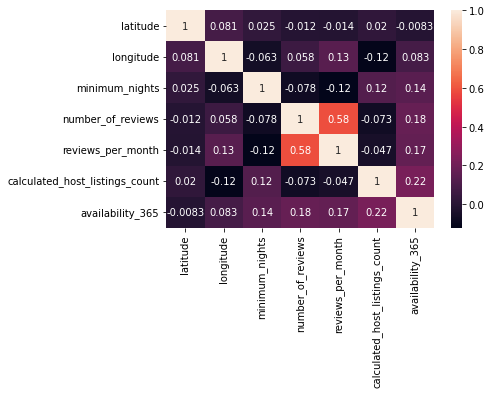

In [155]:
import seaborn as sn
sn.heatmap(df_r, annot=True)

# Make price binary

In [156]:
df['above_average'] = (df.price >= 152).astype(int)

In [157]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [158]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [159]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [160]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [161]:
from sklearn.metrics import mutual_info_score

# Question 3

In [162]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.above_average)

In [163]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi_score = mi.sort_values(ascending=False)
round(mi_score, 2)

room_type              0.14
neighbourhood_group    0.05
dtype: float64

In [164]:
from sklearn.feature_extraction import DictVectorizer

In [165]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [166]:
dv.get_feature_names_out()

array(['availability_365', 'calculated_host_listings_count', 'latitude',
       'longitude', 'minimum_nights', 'neighbourhood_group=Bronx',
       'neighbourhood_group=Brooklyn', 'neighbourhood_group=Manhattan',
       'neighbourhood_group=Queens', 'neighbourhood_group=Staten Island',
       'number_of_reviews', 'reviews_per_month',
       'room_type=Entire home/apt', 'room_type=Private room',
       'room_type=Shared room'], dtype=object)

# Question 4

In [169]:
from sklearn.linear_model import LogisticRegression

In [170]:
model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [173]:
y_pred = model.predict_proba(X_val)[:, 1]
price_decision = (y_pred >= 0.5)

In [181]:
accuracy = (y_val == price_decision).mean()
round(accuracy, 2)

0.79

In [184]:
model.score(X_train, y_train)

0.7929576984695095

In [178]:
from IPython.display import display

In [179]:
global_price = df_full_train.above_average.mean()
global_price

153.75158502914408

In [189]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).above_average.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_price
    df_group['risk'] = df_group['mean'] / global_price
    display(df_group)
    print()

neighbourhood_group


,mean,count,diff,risk
neighbourhood_group,,,,
Bronx,0.072917,864,-153.678668,0.000474
Brooklyn,0.212786,16096,-153.538799,0.001384
Manhattan,0.455178,17380,-153.296407,0.002960
Queens,0.119366,4482,-153.632219,0.000776
Staten Island,0.122449,294,-153.629136,0.000796



room_type


,mean,count,diff,risk
room_type,,,,
Entire home/apt,0.528999,20380,-153.222586,0.003441
Private room,0.063703,17817,-153.687882,0.000414
Shared room,0.058760,919,-153.692826,0.000382


In [187]:
df_full_train[df_full_train.room_type == 'Entire home/apt'].above_average.mean()

0.5289990186457311

# Question 5

In [209]:
all_feature = numerical + categorical
print(all_feature)
print("accuracy "+str(accuracy))
feature_minus = {}
for i in range(1, len(all_feature)):
    min_feature = all_feature[:-i]
    print(all_feature[-i])
    train_dict = df_train[min_feature].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[min_feature].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict_proba(X_val)[:, 1]
    price_decision = (y_pred >= 0.5)
    min_accuracy = (y_val == price_decision).mean()
    
    print("min_accuracy "+str(min_accuracy))
    diff_in_accuracy = accuracy - min_accuracy
    print("Diff "+str(diff_in_accuracy))
    feature_minus[all_feature[-i]] = round(diff_in_accuracy, 3)
    

['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group', 'room_type']
accuracy 0.7907761529808774
room_type
min_accuracy 0.7286021065548625
Diff 0.062174046426014984
neighbourhood_group
min_accuracy 0.7072297780959198
Diff 0.08354637488495764
availability_365
min_accuracy 0.7078433377645976
Diff 0.08293281521627982
calculated_host_listings_count
min_accuracy 0.6932201656611106
Diff 0.09755598731976689
reviews_per_month
min_accuracy 0.6933224256058902
Diff 0.09745372737498725
number_of_reviews
min_accuracy 0.6931179057163309
Diff 0.09765824726454653
minimum_nights
min_accuracy 0.6934246855506698
Diff 0.09735146743020762
longitude
min_accuracy 0.6934246855506698
Diff 0.09735146743020762


In [210]:
feature_minus

{'room_type': 0.062,
 'neighbourhood_group': 0.084,
 'availability_365': 0.083,
 'calculated_host_listings_count': 0.098,
 'reviews_per_month': 0.097,
 'number_of_reviews': 0.098,
 'minimum_nights': 0.097,
 'longitude': 0.097}

In [211]:
min(feature_minus.values())

0.062

### Question 6

In [215]:
from sklearn.linear_model import Ridge

In [212]:
alpha_values = [0, 0.01, 0.1, 1, 10]

In [231]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [232]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [244]:
len(y_train), len(y_val), len(y_test)

(29337, 9779, 9779)

In [233]:
del df_train['price']
del df_val['price']
del df_test['price']

In [254]:
clf = Ridge(alpha=0.1)

In [255]:
ridge = clf.fit(X_train, y_train)

In [247]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [256]:
y_pred = ridge.predict(X_val)
y_pred

array([4.73876173, 4.738632  , 4.73851375, ..., 4.73897179, 4.73865883,
       4.7396293 ])

In [257]:
rmse(y_val, y_pred)

0.6946637196018492

In [237]:
for alpha in alpha_values:
    clf = Ridge(alpha=alpha)
    ridge = clf.fit(X_train, y_train)
    y_pred = ridge.predict(X_val)
    rmse_score = rmse(y_val, y_pred)
    print(f"alpha : {alpha} - RMSE: {round(rmse_score, 3)}")

alpha : 0 - RMSE: 0.692
alpha : 0.01 - RMSE: 0.692
alpha : 0.1 - RMSE: 0.692
alpha : 1 - RMSE: 0.692
alpha : 10 - RMSE: 0.692
